In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Set workspace

Create dataset with classes

In [8]:
d_classes = pd.read_csv('files.csv', delimiter=';')

d_classes.sort_values(by=['folder'], inplace=True)
d_classes.reset_index(drop=True, inplace=True)
d_classes.drop(columns = ['Unnamed: 0','folder'], inplace=True)

d_classes['class']=d_classes['class'].replace([1, 2, 3, 4, 5], 1)
d_classes['class']=d_classes['class'].replace([6, 7, 8], 2)
d_classes['class']=d_classes['class'].replace([9, 10], 3)

d_classes

code  class
0     MR      1
1     MR      1
2     MR      1
3     MR      1
4     MR      1
..   ...    ...
463   FB      2
464   FF      2
465   FF      2
466   FS      2
467   FS      2

[468 rows x 2 columns]

Create list of datasets

In [9]:
#path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
#path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/"

all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    d_file = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(d_file)

### Feature engineering

#### Mean

<AxesSubplot:xlabel='class'>

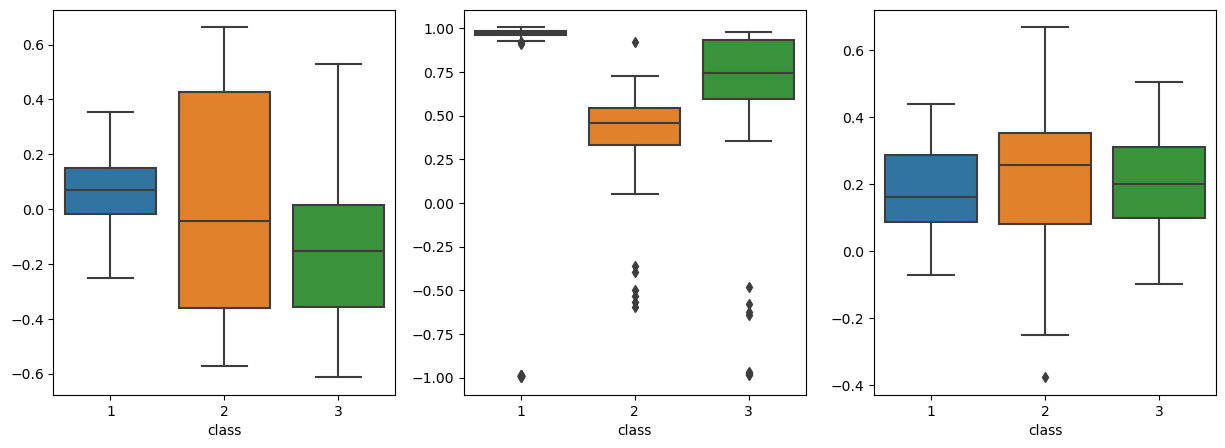

In [10]:
means_x = []
means_y = []
means_z = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=d_classes,ax=axs[2])

#### Variance

<AxesSubplot:xlabel='class'>

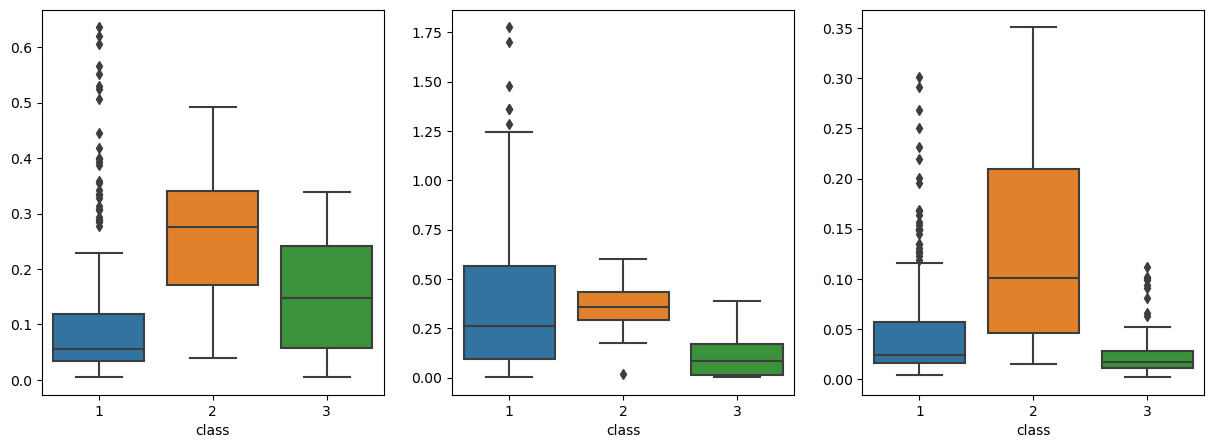

In [11]:
vars_x = []
vars_y = []
vars_z = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=d_classes,ax=axs[2])

#### Median

<AxesSubplot:xlabel='class'>

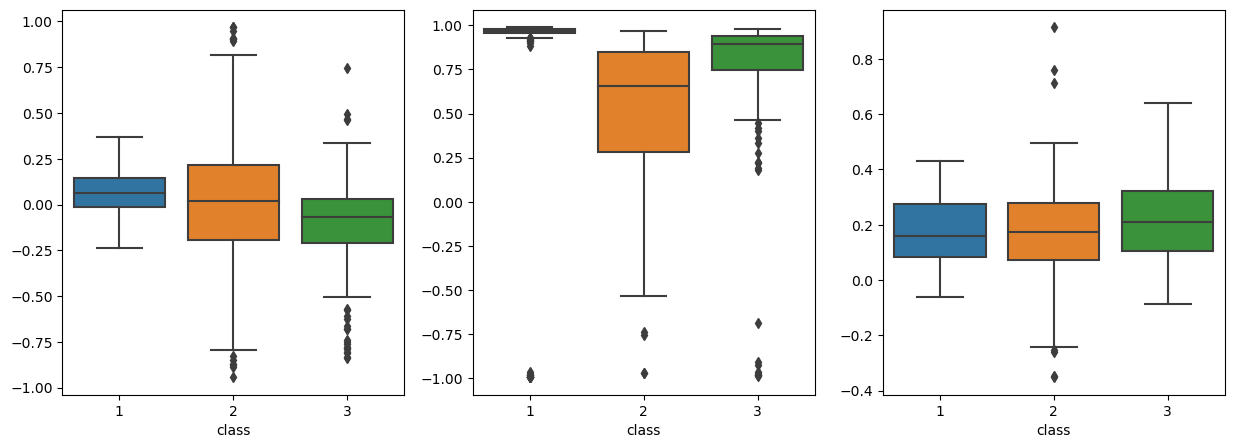

In [12]:
median_x = []
median_y = []
median_z = []

for i in np.arange(len(li)):
    t = np.asarray(li[i].t)

    median_x.append(np.median(li[i].x))

    median_y.append(np.median(li[i].y))

    median_z.append(np.median(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=median_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=median_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=median_z,data=d_classes,ax=axs[2])

#### Mode

<AxesSubplot:xlabel='class'>

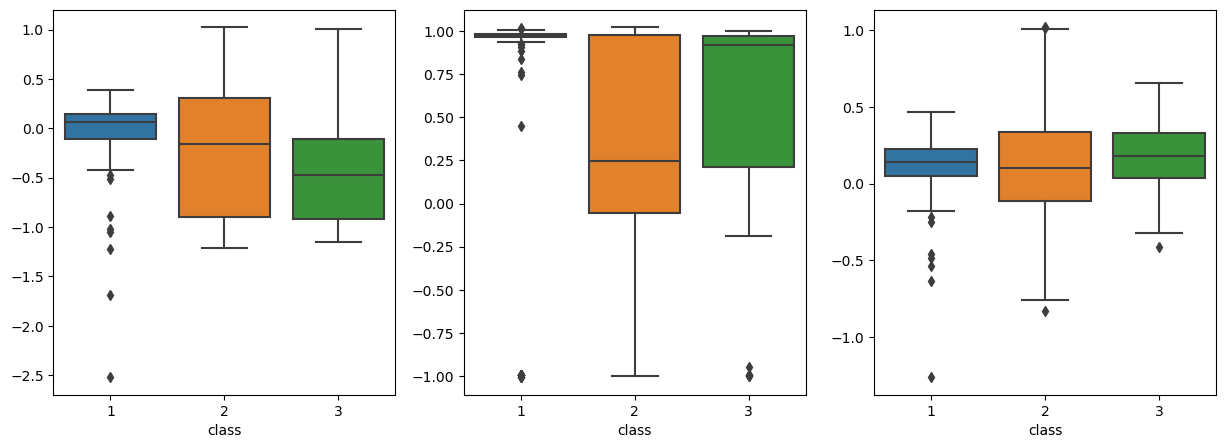

In [13]:
from scipy import stats

mode_x = []
mode_y = []
mode_z = []

for i in np.arange(len(li)):
    mode_x.append(stats.mode(li[i].x, keepdims = True)[0][0])
    mode_y.append(stats.mode(li[i].y, keepdims = True)[0][0])
    mode_z.append(stats.mode(li[i].z, keepdims = True)[0][0])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=mode_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=mode_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=mode_z,data=d_classes,ax=axs[2])

#### RMS

<AxesSubplot:xlabel='class'>

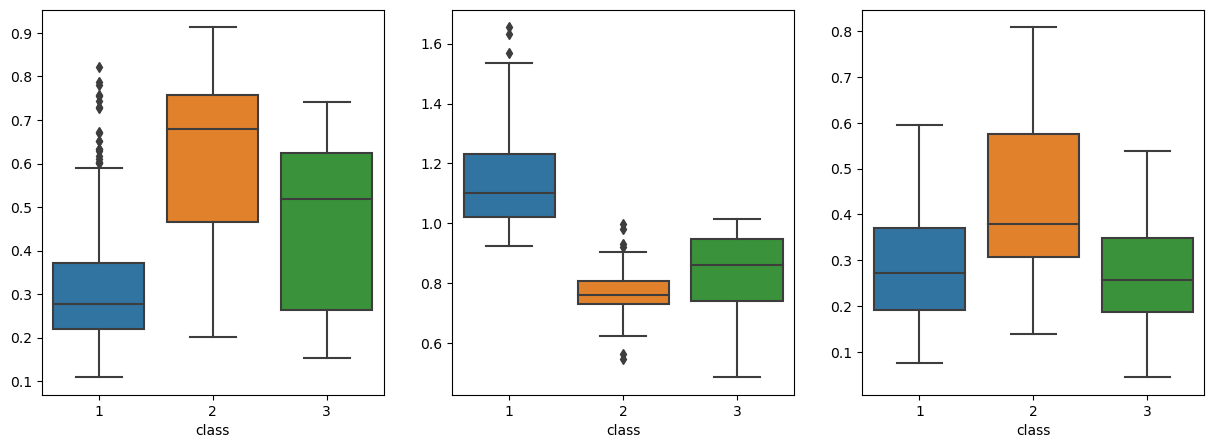

In [14]:
rms_x = []
rms_y = []
rms_z = []

for i in np.arange(len(li)):
    rms_x.append(np.sqrt(np.mean(np.square(li[i].x))))
    rms_y.append(np.sqrt(np.mean(np.square(li[i].y))))
    rms_z.append(np.sqrt(np.mean(np.square(li[i].z))))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=rms_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=rms_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=rms_z,data=d_classes,ax=axs[2])

#### Interquartile Range

<AxesSubplot:xlabel='class'>

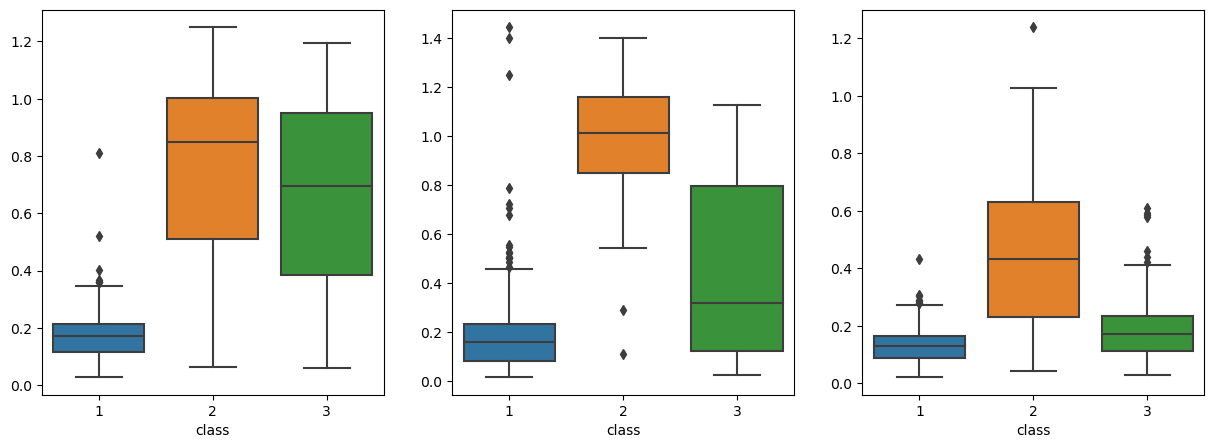

In [15]:
interq_x = []
interq_y = []
interq_z = []

for i in np.arange(len(li)):
    interq_x.append(np.percentile(li[i].x, 75) - np.percentile(li[i].x, 25))
    interq_y.append(np.percentile(li[i].y, 75) - np.percentile(li[i].y, 25))
    interq_z.append(np.percentile(li[i].z, 75) - np.percentile(li[i].z, 25))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=interq_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=interq_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=interq_z,data=d_classes,ax=axs[2])

#### Min-Max & Arg-Max - Arg-Min (with polynomials)

In [16]:
 # Create columns of the output dataset

k = 3
    # Create columns of the output dataset
columns = []
for prefix in ['x', 'y', 'z']:
    for i in range(0, k+1):
        columns.append(f"{prefix}_{i}")
df = pd.DataFrame(columns=columns)

# Loop over all the .csv tables
for i in np.arange(len(li)): #da cambiare con len(ls)

    # Get values from every table
    x = np.asarray(li[i].x)
    y = np.asarray(li[i].y)
    z = np.asarray(li[i].z)
    t = np.asarray(li[i].t)

    # Get coefficients of the polynomial fit of order k of x, y, z
    coef_x = np.polyfit(t,x,deg=k,full=False)
    coef_y = np.polyfit(t,y,deg=k,full=False)
    coef_z = np.polyfit(t,z,deg=k,full=False)

    # Add coefficients to the final dataset
    row = []
    for j in np.arange(k+1):
        row.append(coef_x[j])
    for j in np.arange(k+1):
        row.append(coef_y[j])
    for j in np.arange(k+1):
        row.append(coef_z[j])
    df.loc[i] = row


<AxesSubplot:xlabel='class'>

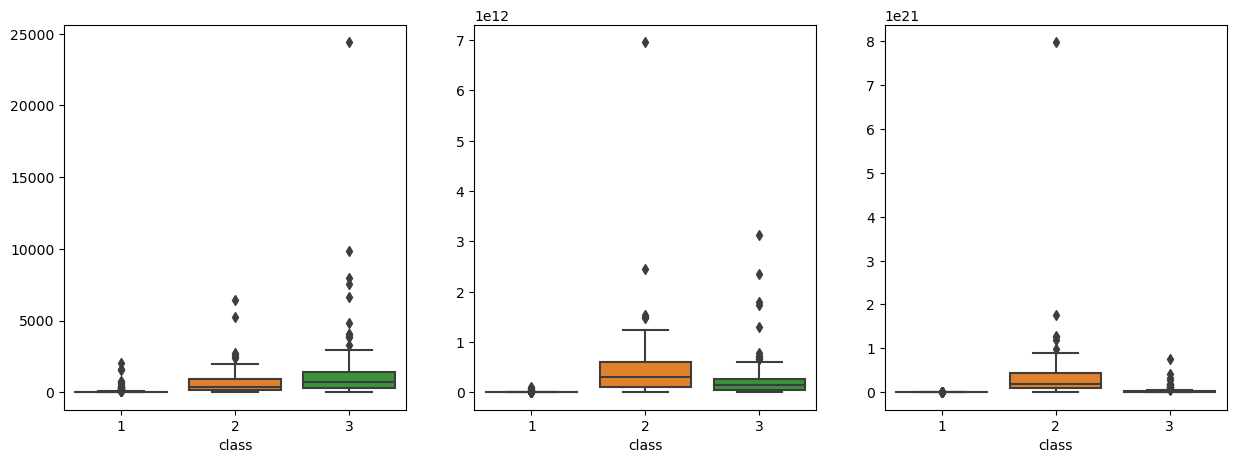

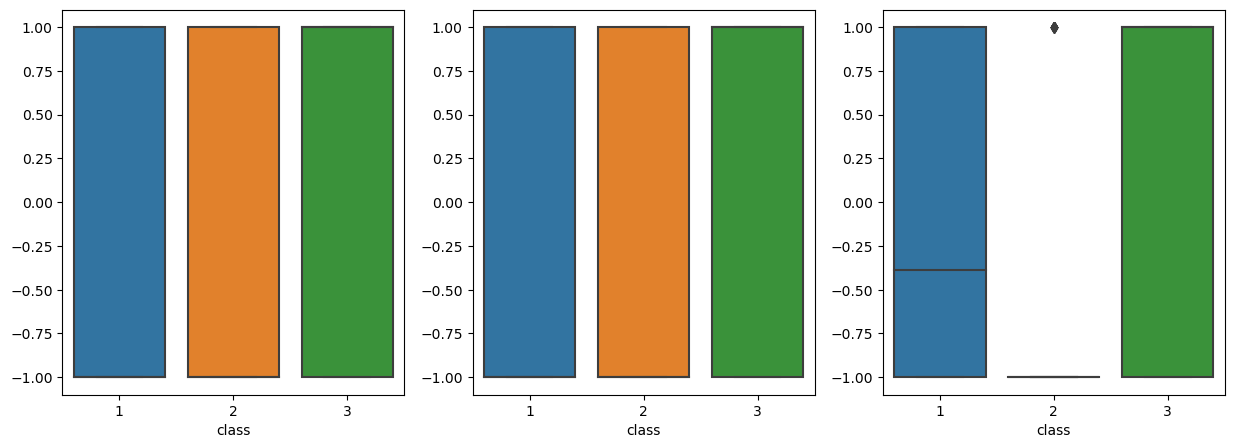

In [17]:
delta_x = []
deltarg_x = []
delta_y = []
deltarg_y = []
delta_z = []
deltarg_z = []

for i in np.arange(len(df)):

    t = np.asarray(li[i].t)
    len_t = len(li[i])

    coef_x = df.iloc[i,:4]
    poly_x = np.poly1d(coef_x)
    delta_x.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)

    coef_y = df.iloc[i,4:8]
    poly_y = np.poly1d(coef_y)
    delta_y.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t)

    coef_z = df.iloc[i,8:]
    poly_z = np.poly1d(coef_z)
    delta_z.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=delta_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=delta_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=delta_z,data=d_classes,ax=axs[2])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=deltarg_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=deltarg_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=deltarg_z,data=d_classes,ax=axs[2])

#### Length

<AxesSubplot:xlabel='class'>

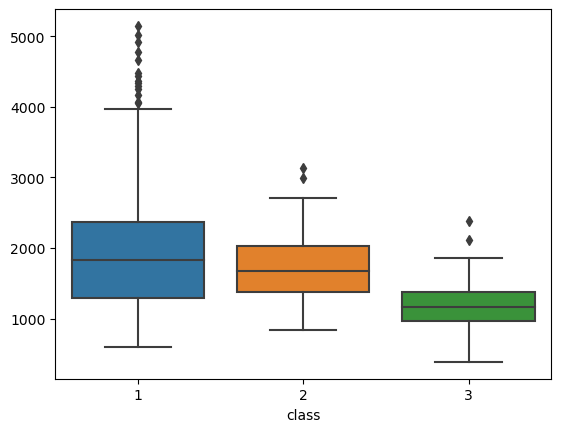

In [18]:
length = []

for i in np.arange(len(li)): 
    length.append(len(li[i]))
    
sns.boxplot(x='class',y=length, data=d_classes)

#### %Peaks over Threshold

<AxesSubplot:xlabel='class'>

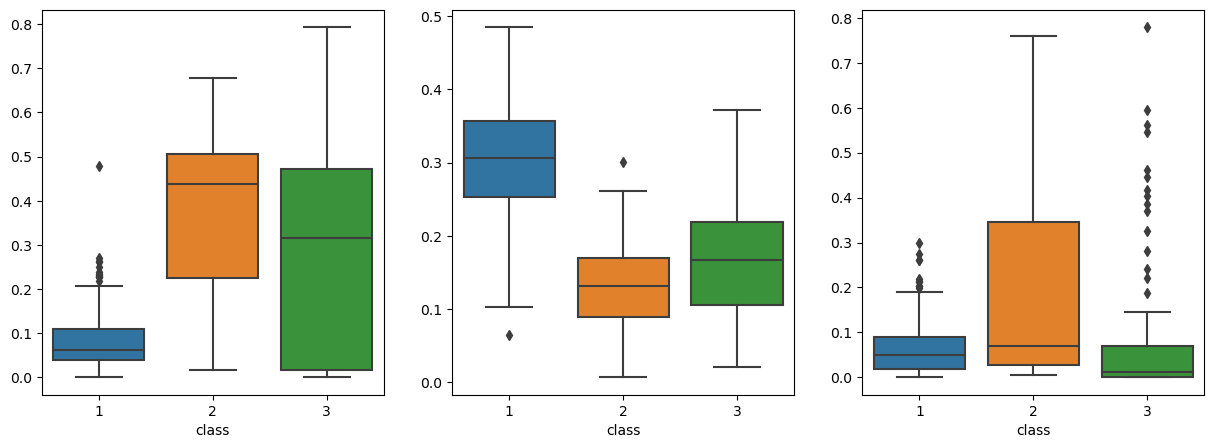

In [19]:
peaks_x = []
peaks_y = []
peaks_z = []
eps_x = 0.5
eps_y = 1
eps_z = 0.5

for i, item in enumerate(li):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x.append(count_x/len_t)
    peaks_y.append(count_y/len_t)
    peaks_z.append(count_z/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=peaks_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=peaks_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=peaks_z,data=d_classes,ax=axs[2])

#### %Positive Points

<AxesSubplot:xlabel='class'>

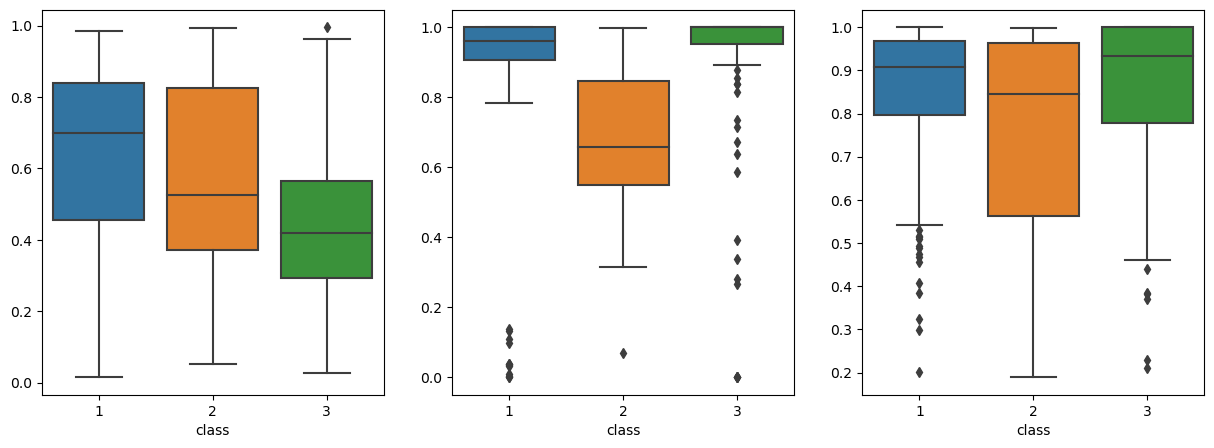

In [20]:
pn_x = []
pn_y = []
pn_z = []

for i in np.arange(len(li)):
    pos_x = li[i][li[i].x>=0].x.count()
    neg_x = li[i][li[i].x<0].x.count()

    pos_y = li[i][li[i].y>=0].y.count()
    neg_y = li[i][li[i].y<0].y.count()

    pos_z = li[i][li[i].z>=0].z.count()
    neg_z = li[i][li[i].z<0].z.count()

    pn_x.append(pos_x/(pos_x+neg_x))
    pn_y.append(pos_y/(pos_y+neg_y))
    pn_z.append(pos_z/(pos_z+neg_z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=pn_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=pn_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=pn_z,data=d_classes,ax=axs[2])

#### %Zero Crossing Points

<AxesSubplot:xlabel='class'>

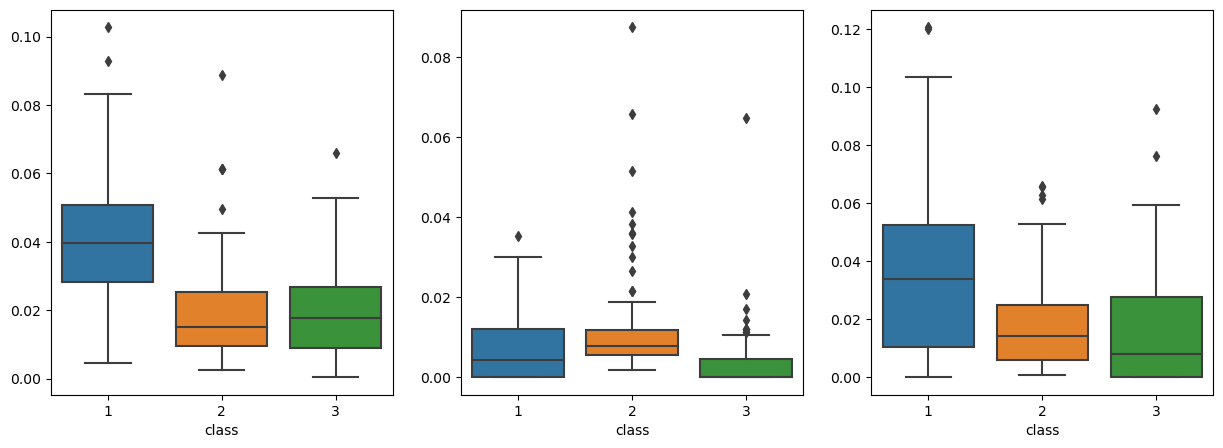

In [21]:
zero_crossing_x = []
zero_crossing_y = []
zero_crossing_z = []

for i in np.arange(len(li)):
    zero_crossing_x.append(len(np.where(np.diff(np.sign(li[i].x)))[0]) / len(li[i].x))
    zero_crossing_y.append(len(np.where(np.diff(np.sign(li[i].y)))[0]) / len(li[i].y))
    zero_crossing_z.append(len(np.where(np.diff(np.sign(li[i].z)))[0]) / len(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=zero_crossing_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=zero_crossing_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=zero_crossing_z,data=d_classes,ax=axs[2])

#### Energy

<AxesSubplot:xlabel='class'>

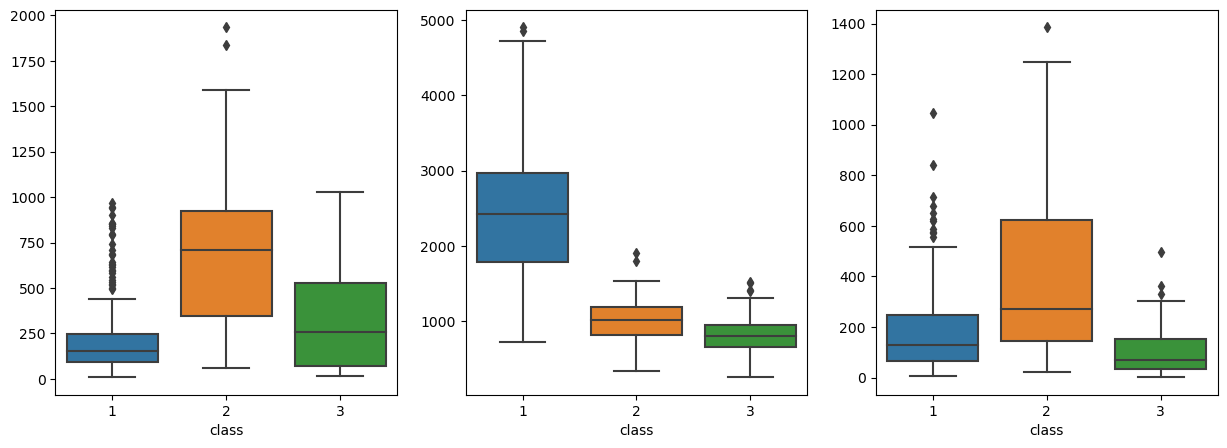

In [22]:
energies_x = []
energies_y = []
energies_z = []

for i in np.arange(len(li)):

    en_x = np.sum(li[i].x**2)
    en_y = np.sum(li[i].y**2)
    en_z = np.sum(li[i].z**2)
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    energies_x.append(en_x)
    energies_y.append(en_y)
    energies_z.append(en_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=energies_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=energies_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=energies_z,data=d_classes,ax=axs[2])

#### Power

<AxesSubplot:xlabel='class'>

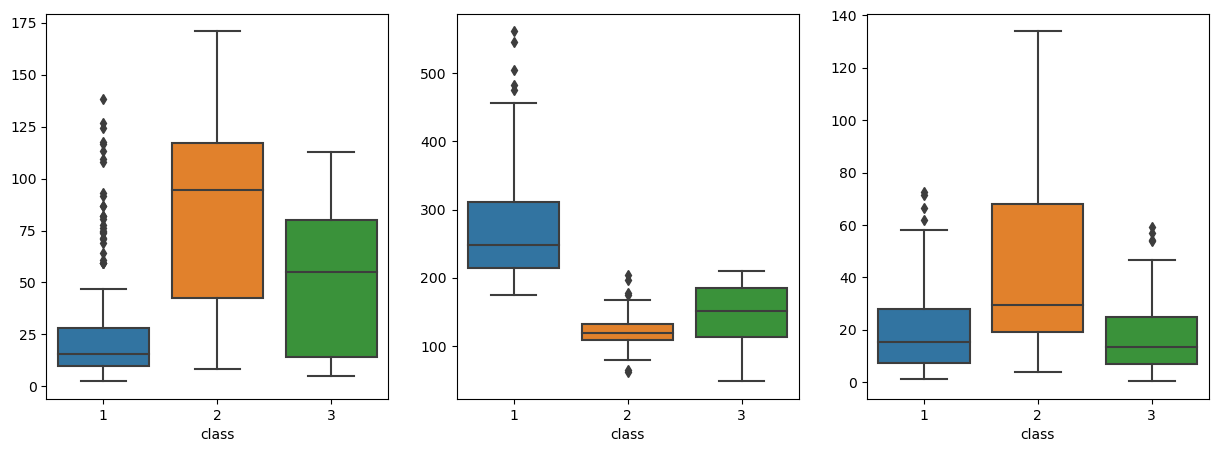

In [23]:
powers_x = []
powers_y = []
powers_z = []

for i in np.arange(len(li)):

    duration = li[i].t[len(li[i])-1]-li[i].t[0]
    pow_x = np.sum(li[i].x**2)/duration
    pow_y = np.sum(li[i].y**2)/duration
    pow_z = np.sum(li[i].z**2)/duration
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    powers_x.append(pow_x)
    powers_y.append(pow_y)
    powers_z.append(pow_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=powers_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=powers_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=powers_z,data=d_classes,ax=axs[2])

#### Skewness

<AxesSubplot:xlabel='class'>

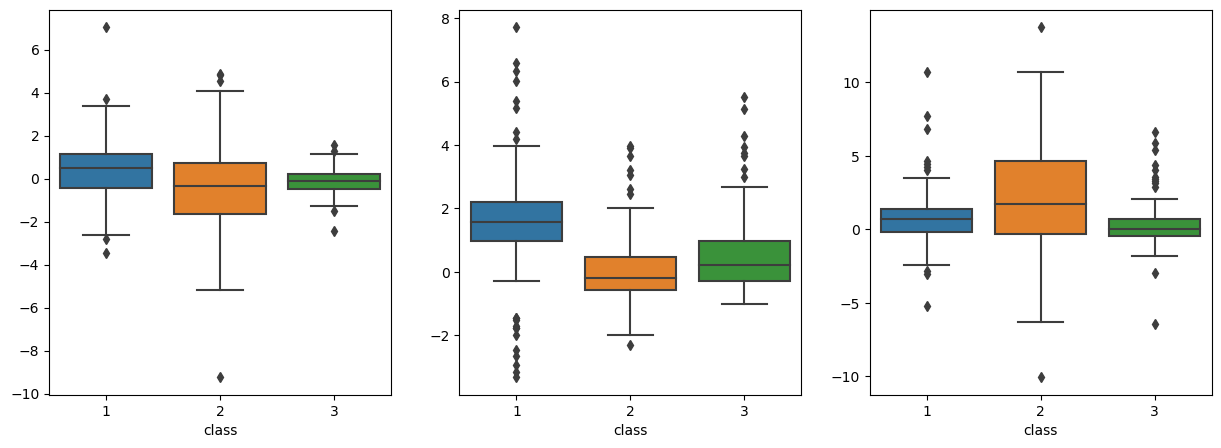

In [24]:
from scipy.stats import skew

skew_x = []
skew_y = []
skew_z = []

for i in np.arange(len(li)):
    skew_x.append(skew(li[i].x))
    skew_y.append(skew(li[i].y))
    skew_z.append(skew(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=skew_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=skew_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=skew_z,data=d_classes,ax=axs[2])


#### Kurtosis

(-10.0, 160.0)

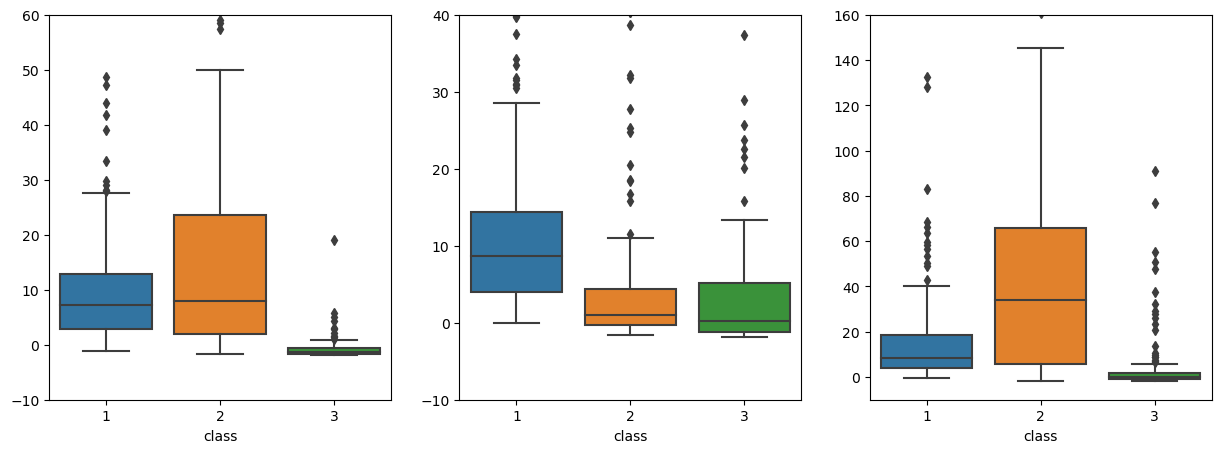

In [25]:
from scipy.stats import kurtosis

kurtosis_x = []
kurtosis_y = []
kurtosis_z = []

for i in np.arange(len(li)):
    kurtosis_x.append(kurtosis(li[i].x))
    kurtosis_y.append(kurtosis(li[i].y))
    kurtosis_z.append(kurtosis(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=kurtosis_x,data=d_classes,ax=axs[0])
axs[0].set_ylim(-10,60)
sns.boxplot(x='class',y=kurtosis_y,data=d_classes,ax=axs[1])
axs[1].set_ylim(-10,40)
sns.boxplot(x='class',y=kurtosis_z,data=d_classes,ax=axs[2])
axs[2].set_ylim(-10,160)

#### Entropy

<AxesSubplot:xlabel='class'>

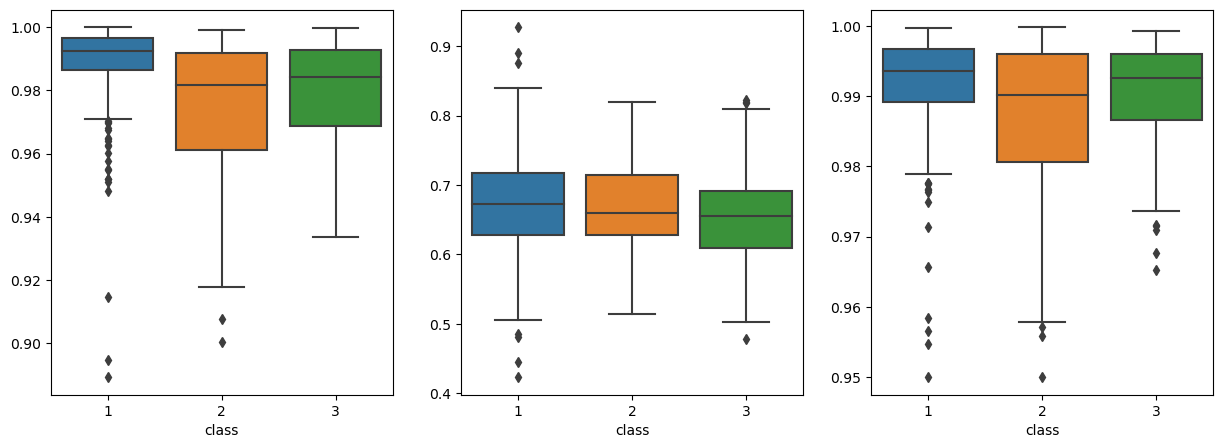

In [26]:
entropy_x = []
entropy_y = []
entropy_z = []

for i in np.arange(len(li)):
    valuex, countsx = np.unique(li[i].x, return_counts=True)
    px = countsx / countsx.sum()
    px = px[np.where(px != 0)]
    if np.log2(len(li[i].x)) == 1:
        entropy_x.append(0)
    elif np.sum(px * np.log2(px)) / np.log2(len(li[i].x)) == 0:
        entropy_x.append(0)
    else:
        entropy_x.append(- np.sum(px * np.log2(px)) / np.log2(len(li[i].x)))
        
    valuey, countsy = np.unique(li[i].y, return_counts=True)
    py = countsy / countsy.sum()
    py = py[np.where(py != 0)]
    if np.log2(len(li[i].y)) == 1:
        entropy_y.append(0)
    elif np.sum(py * np.log2(py)) / np.log2(len(li[i].y)) == 0:
        entropy_y.append(0)
    else:
        entropy_y.append(- np.sum(py * np.log2(py)) / np.log2(len(li[i].y)))
        
    valuez, countsz = np.unique(li[i].z, return_counts=True)
    pz = countsz / countsz.sum()
    pz = pz[np.where(pz != 0)]
    if np.log2(len(li[i].z)) == 1:
        entropy_z.append(0)
    elif np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)) == 0:
        entropy_z.append(0)
    else:
        entropy_z.append(- np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)))
   
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=entropy_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=entropy_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=entropy_z,data=d_classes,ax=axs[2])

#### Temporal Centroid

<AxesSubplot:xlabel='class'>

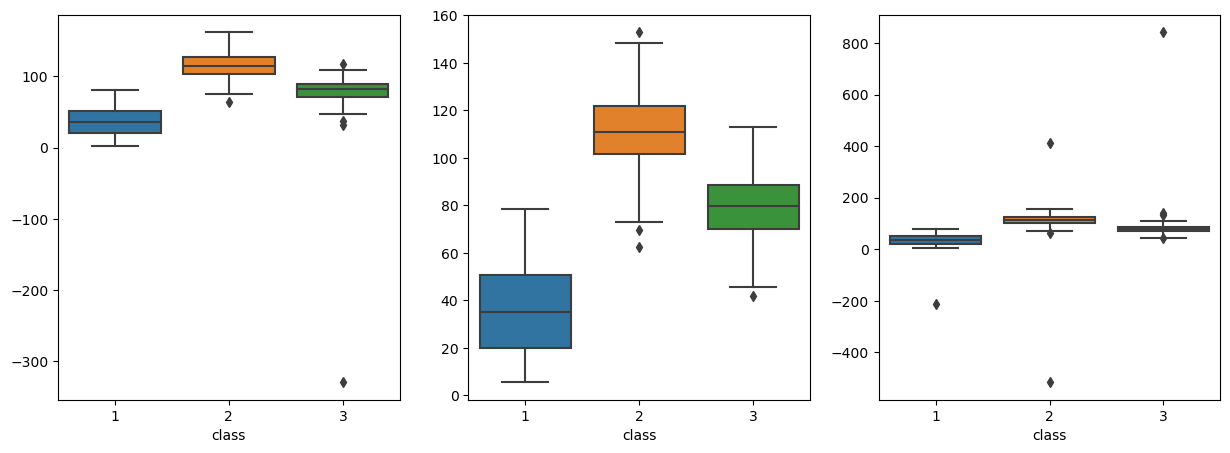

In [27]:
temporal_centroid_x = []
temporal_centroid_y = []
temporal_centroid_z = []

for i in np.arange(len(li)):
    temporal_centroid_x.append(np.sum(li[i].t * li[i].x) / np.sum(li[i].x))
    temporal_centroid_y.append(np.sum(li[i].t * li[i].y) / np.sum(li[i].y))
    temporal_centroid_z.append(np.sum(li[i].t * li[i].z) / np.sum(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=temporal_centroid_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=temporal_centroid_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=temporal_centroid_z,data=d_classes,ax=axs[2])

### Create final dataset

In [28]:
columns = []
for prefix in ['x', 'y', 'z']:
    columns.append(f"mean_{prefix}")
    columns.append(f"var_{prefix}")
    
data = pd.DataFrame({'mean_x': means_x,
                  'mean_y': means_y,
                  'mean_z': means_z,
                  'var_x': vars_x,
                  'var_y': vars_y,
                  'var_z': vars_z,
                  '%_peaks_x': peaks_x,
                  '%_peaks_y': peaks_y,
                  '%_peaks_z': peaks_z,
                  '%_positive_x': pn_x,
                  '%_positive_y': pn_y,
                  '%_positive_z': pn_z,
                  'length': length,
                  'power_x': powers_x,
                  'power_y': powers_y,
                  'power_z': powers_z,
                  'temporal_centroid_x': temporal_centroid_x,
                  'temporal_centroid_y': temporal_centroid_y,
                  'temporal_centroid_z': temporal_centroid_z,
                  'max-min_x': delta_x,
                  'max-min_y': delta_y,
                  'max-min_z': delta_z,
                  
                    })
            
data = pd.concat([data,d_classes],axis=1)
data = data.drop('code',axis=1)
data

mean_x    mean_y    mean_z     var_x     var_y     var_z  %_peaks_x  \
0    0.197327  0.984034  0.204366  0.635922  1.034954  0.157123   0.261976   
1    0.256494  0.971935  0.040016  0.358201  0.907888  0.149493   0.197133   
2    0.234874  0.987340  0.099502  0.398661  0.952047  0.128058   0.207510   
3    0.135252  0.978889  0.205274  0.551640  1.362784  0.195095   0.263555   
4    0.057615  0.968606  0.293164  0.524964  1.285501  0.268192   0.226877   
..        ...       ...       ...       ...       ...       ...        ...   
463  0.418134 -0.397167  0.068148  0.333795  0.477936  0.017336   0.466268   
464 -0.504110 -0.497165 -0.013886  0.235744  0.364027  0.019134   0.429648   
465 -0.504246 -0.564383 -0.036012  0.335457  0.303479  0.031983   0.487069   
466 -0.084112 -0.532522  0.431918  0.115677  0.509875  0.268020   0.048199   
467 -0.058477 -0.593385  0.407899  0.155797  0.498845  0.269411   0.059060   

     %_peaks_y  %_peaks_z  %_positive_x  ...     power_x     power_y  \
0     0.353293   0.140719      0.740269  ...  138.207770  410.391686   
1     0.294504   0.100358      0.863799  ...   86.840585  379.514685   
2     0.314229   0.091568      0.858366  ...   92.954040  394.770334   
3     0.412491   0.169526      0.723404  ...  116.714582  475.435539   
4     0.321545   0.260609      0.572905  ...  108.189556  455.504133   
..         ...        ...           ...  ...         ...         ...   
463   0.260609   0.012514      0.642002  ...  104.183978  130.200430   
464   0.163317   0.004188      0.073702  ...  100.372400  125.220404   
465   0.206897   0.013793      0.219828  ...  120.908967  127.537516   
466   0.203324   0.379501      0.111357  ...   25.165036  162.690348   
467   0.236242   0.346980      0.467114  ...   32.610260  174.335257   

       power_z  temporal_centroid_x  temporal_centroid_y  temporal_centroid_z  \
0    40.736029            49.637285            49.406692            49.042419   
1    30.944051            37.487597            37.482466            38.069584   
2    28.256086            38.245625            37.869585            38.917355   
3    48.586830            53.756702            53.326641            53.309472   
4    72.534759            60.549150            59.576338            58.969607   
..         ...                  ...                  ...                  ...   
463   4.501975           125.034414           118.733588           123.480492   
464   3.958287            96.688278            93.835951           105.869677   
465   6.820910            99.040011            96.642184           102.549907   
466  93.208517           108.436436           104.562922           108.972164   
467  89.279417           112.068521           106.778753           110.028650   

       max-min_x     max-min_y     max-min_z  class  
0      57.805885  1.503806e+09  1.888241e+16      1  
1      15.940651  1.375741e+08  4.801876e+13      1  
2      25.959070  2.339014e+08  2.109214e+14      1  
3      10.004809  3.445014e+08  4.179427e+16      1  
4      44.233225  2.419188e+09  2.416450e+16      1  
..           ...           ...           ...    ...  
463   635.549528  6.173184e+11  4.594434e+20      2  
464  1945.723033  6.979258e+11  1.756136e+20      2  
465  2726.098668  1.072454e+12  2.998820e+20      2  
466   154.891507  8.770442e+10  2.695321e+19      2  
467   346.742725  2.074601e+11  5.895205e+19      2  

[468 rows x 23 columns]

#### Study of correlation between retained features

<AxesSubplot:>

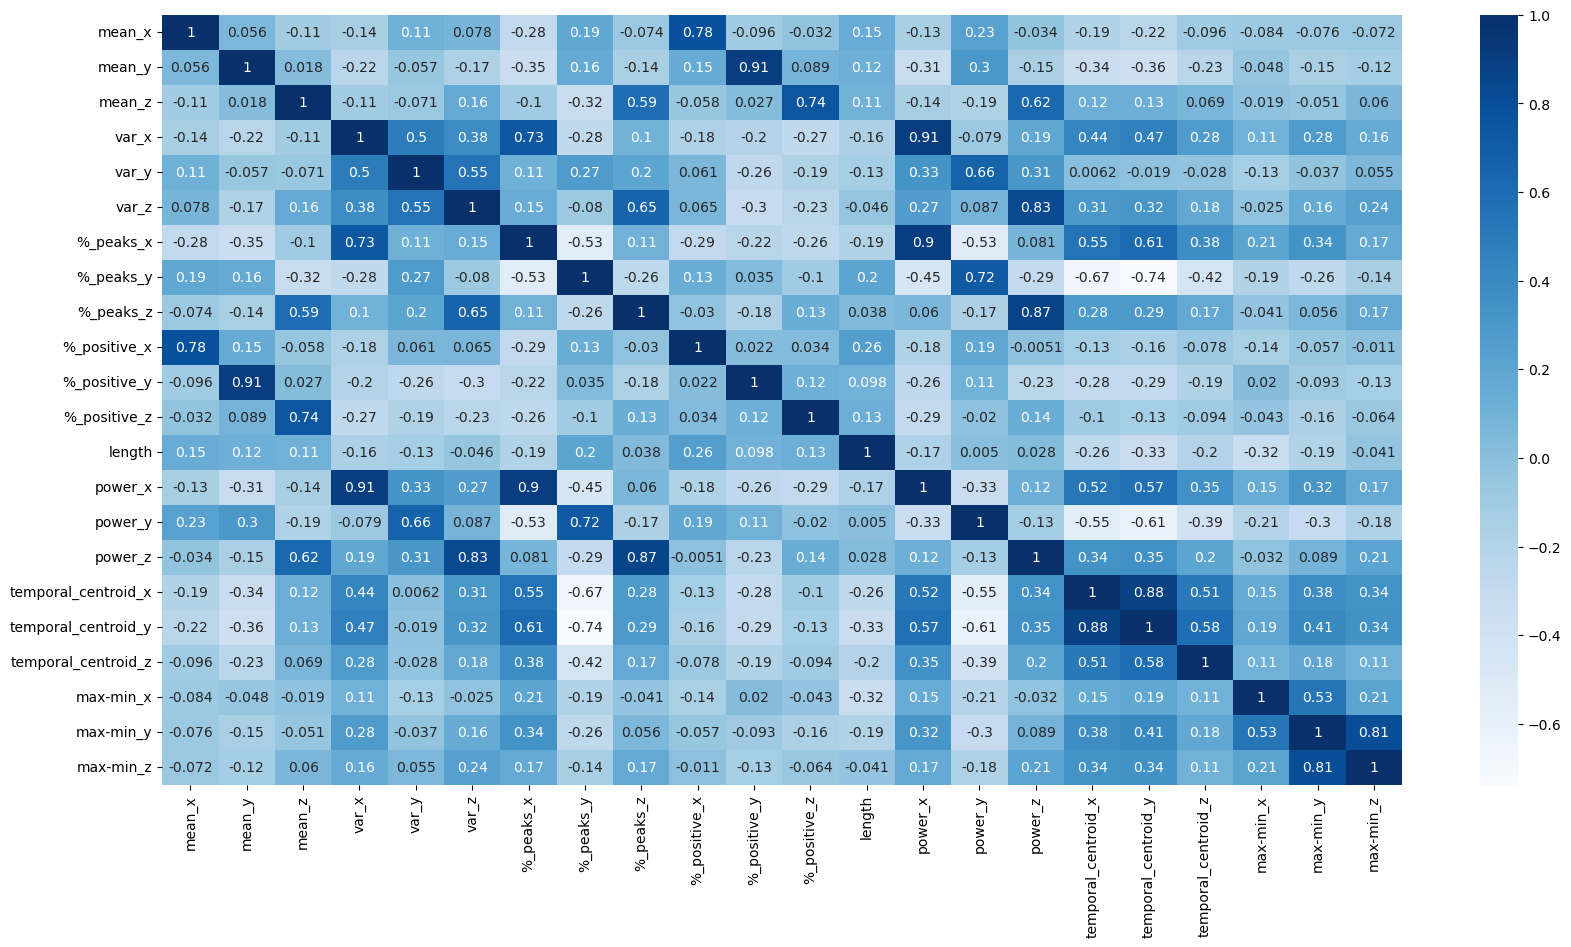

In [29]:
Corr_matrix=data.iloc[:,:-1].corr() #between all possible pairs of variable, df è il nostro dataframe
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues")

#### Removing correlated features

In [30]:
data = data.drop('temporal_centroid_x',axis=1)
data = data.drop('%_positive_y',axis=1)
data = data.drop('power_x',axis=1)
data = data.drop('power_z',axis=1)
data = data.drop('%_peaks_x',axis=1)

#### Final Features

<AxesSubplot:>

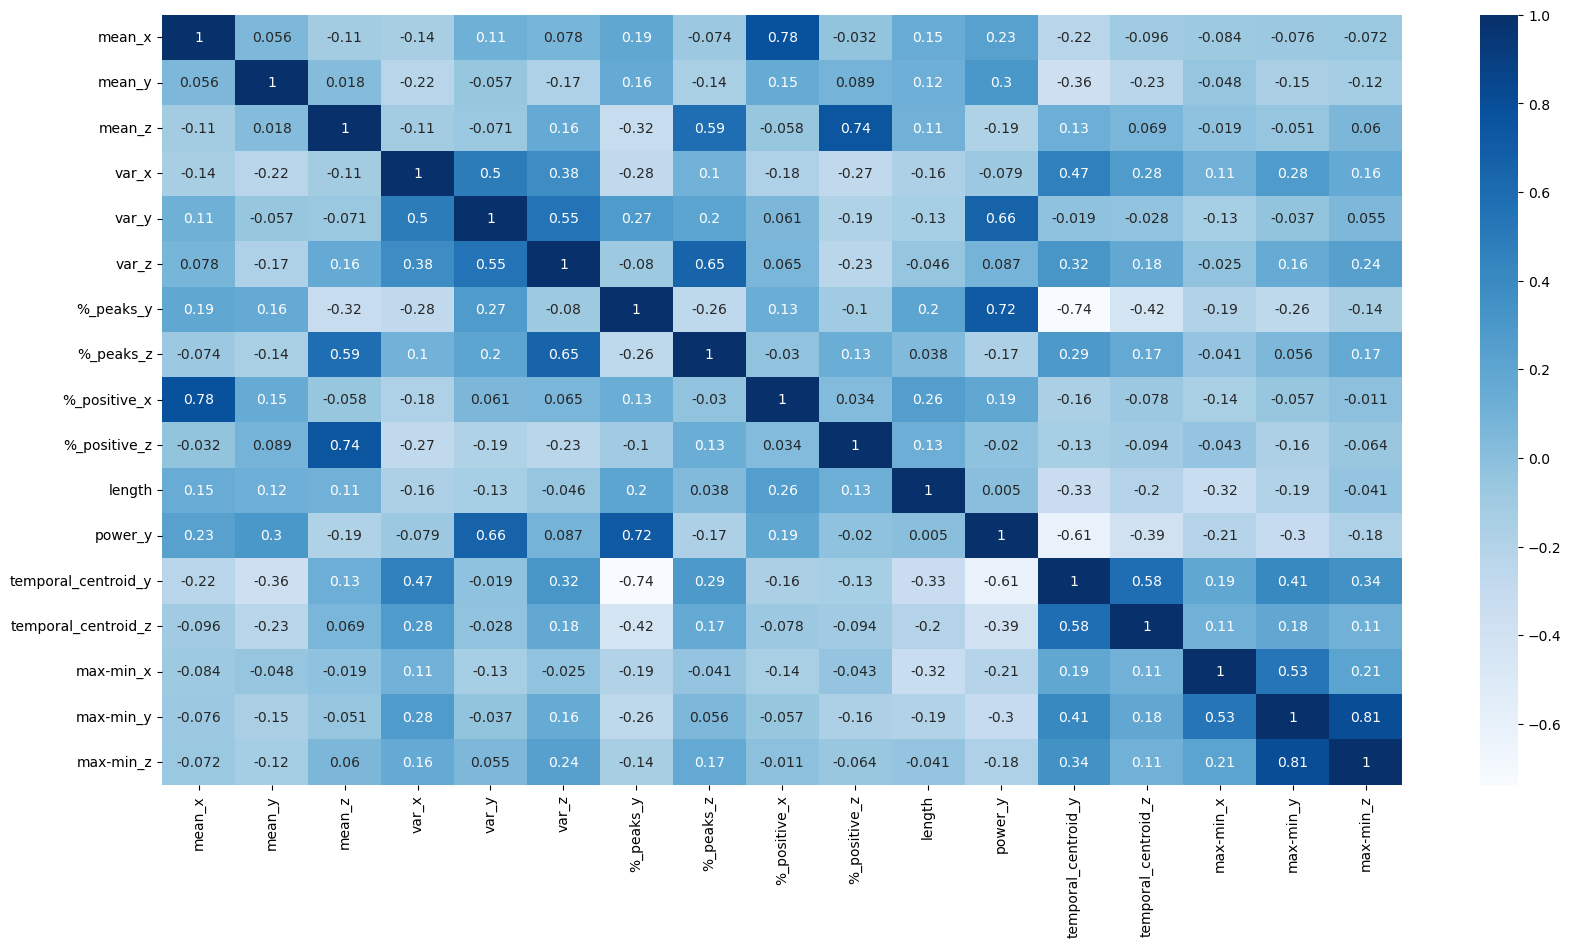

In [31]:
Corr_matrix=data.iloc[:,:-1].corr() #between all possible pairs of variable, df è il nostro dataframe
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues")

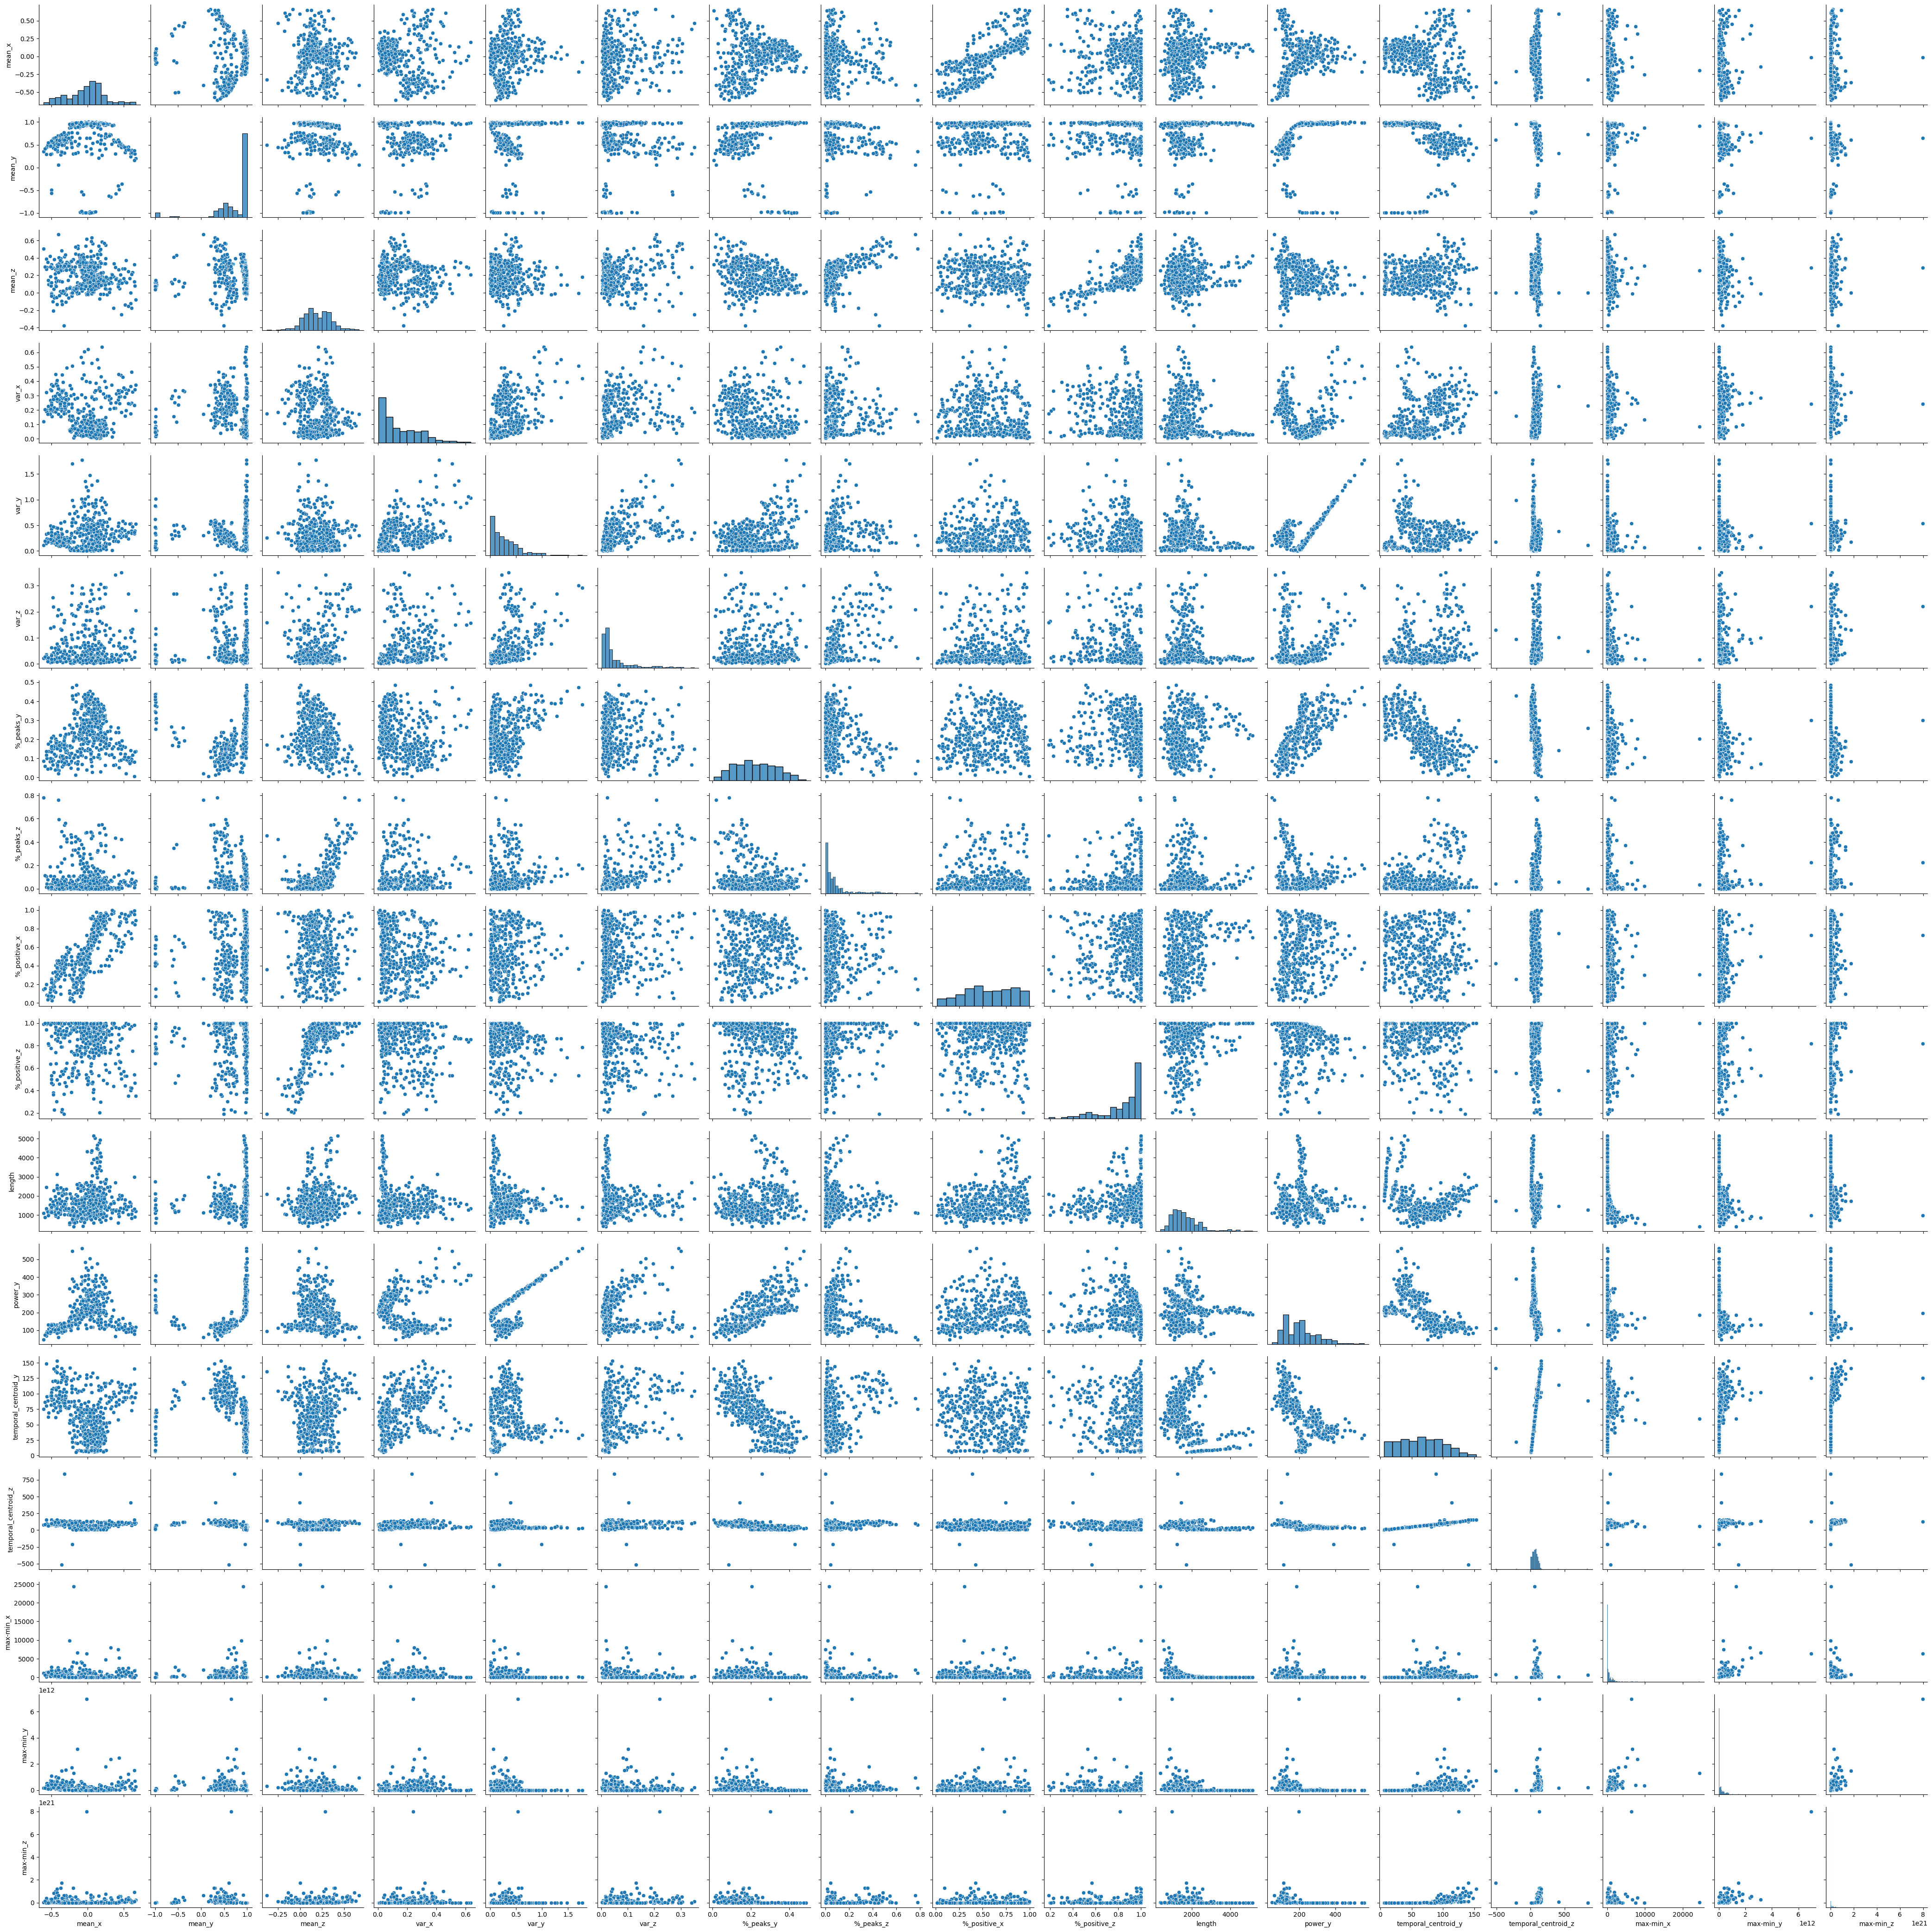

In [32]:
sns.pairplot(data.iloc[:,:-1])  #df1 è il dataframe delle colonne con le variabili

### Classification

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalization of the train set

In [36]:
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

#### Cross Validation applied to different models

In [37]:
from sklearn.model_selection import cross_validate, GridSearchCV

#### SVM

In [38]:
from sklearn import svm

svmc = svm.SVC(random_state=42)
param_grid = [{'kernel': ['linear'],'C': [1, 10, 100, 1000], },
  {'kernel': ['rbf', 'poly', 'sigmoid'],'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], }, 
]

grid_search_svm = GridSearchCV(estimator=svmc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'C': 1, 'kernel': 'linear'}
0.9784495021337127


#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, 15, 20]
    }  

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'max_depth': 5, 'n_estimators': 100}
0.9784495021337127


#### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
reglog = LogisticRegression(multi_class='multinomial', random_state = 42, max_iter = 1000000)
scores = cross_validate(reglog, X_train, y_train, cv=10)

print(scores['test_score'].mean())

0.4866287339971551


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\U

#### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# perform grid search cv
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 20))}
grid_search = GridSearchCV(knn, params, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

{'n_neighbors': 4}
0.959815078236131


#### Select the best model 

In [42]:
win_svm = svm.SVC(random_state=42, C=10, kernel='linear')
win_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_svm = cross_validate(win_svm, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_rf = cross_validate(win_rf, X_train, y_train, cv=10, scoring=scoring)
scores_reglog = cross_validate(reglog, X_train_scaled, y_train, cv=10, scoring=scoring)

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores = pd.DataFrame({'model': ['svm', 'rf', 'reglog'],
                       'accuracy': [scores_svm['test_accuracy'].mean(), scores_rf['test_accuracy'].mean(), scores_reglog['test_accuracy'].mean()],
                       'precision': [scores_svm['test_precision_macro'].mean(), scores_rf['test_precision_macro'].mean(), scores_reglog['test_precision_macro'].mean()],
                       'recall': [scores_svm['test_recall_macro'].mean(), scores_rf['test_recall_macro'].mean(), scores_reglog['test_recall_macro'].mean()],
                       'f1': [scores_svm['test_f1_macro'].mean(), scores_rf['test_f1_macro'].mean(), scores_reglog['test_f1_macro'].mean()]
                       })

# Print the dataframe
scores

model  accuracy  precision    recall        f1
0     svm  0.959602   0.956486  0.954040  0.952865
1      rf  0.978450   0.975663  0.975168  0.973777
2  reglog  0.973044   0.971131  0.966835  0.966982

#### Best model 

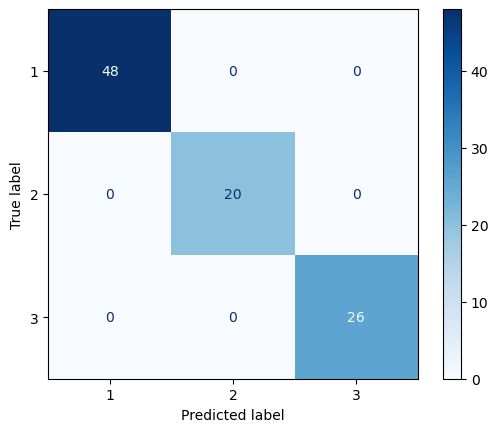

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

win_rf.fit(X_train, y_train)
y_pred = win_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_rf.classes_)
disp.plot(cmap='Blues')

#### Feature Importance 

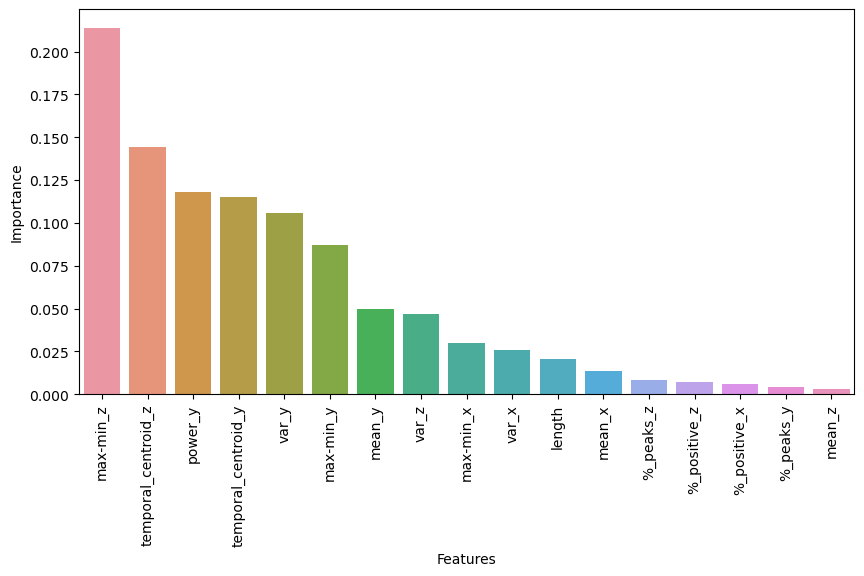

In [44]:
# Get the feature importances
importances = win_rf.feature_importances_

# Create a dataframe of feature importances, sorted descendingly
feat = pd.DataFrame({'feature': X.columns,
                     'importance': importances}).sort_values('importance', ascending=False)

# Create a figure
plt.figure(figsize=(10, 5))

# Create a barplot of the feature importances
sns.barplot(x=feat.feature, y=feat.importance)

# Rotate tick marks on x-axis
plt.xticks(rotation=90)

# Create labels
plt.xlabel("Features")
plt.ylabel("Importance")

# Show plot
plt.show()